In [15]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [13]:
def rebuild():
    # change into mathieu
    os.chdir('mathieu')
    

    # call 'make clean mathieu'
    os.system('make clean mathieu')


    # change back up to code directory
    os.chdir('..')

In [14]:
def build():
    # change into mathieu
    os.chdir('mathieu')
    

    # call 'make mathieu'
    os.system('make mathieu')


    # change back up to code directory
    os.chdir('..')


In [4]:
def generate_input(N,q):

    os.chdir('mathieu')
    if "mathieu.init" in os.listdir(os.curdir):
        os.system('mv mathieu.init mathieu.init.bak')
    
    fp = open('mathieu.init','w')
    fp.write(f'num_points {N}\n')
    fp.write(f'q_index {q}\n')
    fp.write(f'run_name Mathieu_{N}_{q}')
    fp.close()
    os.chdir('..')


In [5]:
def run_mathieu(N,q):

    build()
    generate_input(N,q)
    os.chdir('mathieu')
    os.system('./mathieu')
    os.chdir('..')

In [6]:
def parsweep_mathieu(N):
    # Range of q values to test
    qRange = np.arange(0,42,2)
    for q in qRange:
        run_mathieu(N,q)

In [7]:
def plot_parsweep(N,nPlot):
    # Set range and space to store data
    qRange = np.arange(0,42,2)
    evals = np.zeros([len(qRange),nPlot])
    # Open files and extract relevant data
    for idx,q in enumerate(qRange):
        fname = 'mathieu/data/Mathieu_' + str(N) + '_' + str(q) + '.dat'
        data = np.loadtxt(fname)
        evals[idx,:] = np.sort(data[:,1])[0:nPlot]
    # Generate a plot of the eigenvalues as a function of the parameter q
    plt.figure(figsize=(12,8))
    plt.xlabel('q')
    plt.ylabel('evals')
    plt.title('Mathieu Function')
    plt.plot(qRange,evals,'-k')
    plt.plot(qRange,1+qRange-(1/8)*qRange**2-(1/64)*qRange**3,'-k', linestyle = '--', color = 'cornflowerblue')
    plt.plot(qRange,4-(1/12)*qRange**2+(5/13824)*qRange**4,'-k', linestyle = '--', color = 'cornflowerblue')
    plt.grid(True)
    plt.show()

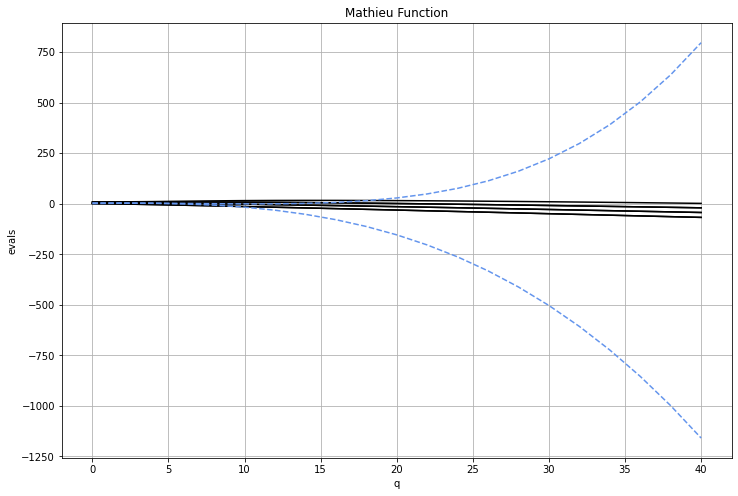

In [11]:
N = 101
rebuild()
parsweep_mathieu(N)
plot_parsweep(N,7)
